In [1]:
import tensorflow as tf
import numpy as np
# from PIL import Image
import matplotlib.pyplot as plt

In [2]:
filename_queue = tf.train.string_input_producer(['./data/train.tfrecords'])

reader = tf.TFRecordReader()
_, serialized_example = reader.read(filename_queue)   # 返回文件名和文件
features = tf.parse_single_example(serialized_example,
                                features={
                                           'labels': tf.FixedLenFeature([], tf.int64),
                                           'image_raw': tf.FixedLenFeature([], tf.string)
                                       })

img = tf.decode_raw(features['image_raw'], tf.uint8)
labels = tf.cast(features['labels'], tf.int32)

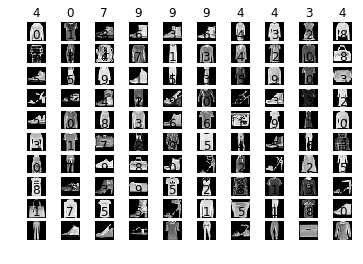

INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.CancelledError'>, Enqueue operation was cancelled
	 [[Node: input_producer/input_producer_EnqueueMany = QueueEnqueueManyV2[Tcomponents=[DT_STRING], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](input_producer, input_producer/RandomShuffle)]]


In [3]:
with tf.Session() as sess:
    # 启动多线程
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)

    for i in range(1, 101):
        # 获取一张图片和其对应的类型
        label, image = sess.run([labels, img])
        image = np.reshape(image, [28, 28])
        plt.figure(1)
        plt.subplot(10, 10, i)
        plt.imshow(image, cmap=plt.cm.gray)
        plt.title(label)
        plt.axis('off')
    plt.show()

![](./img/Figure_1.png)

![图](./images/Figure_1.png)